# Introduction to Convolutional Neural Networks and Computer Vision

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognising the car in front.

# Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-30 15:54:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   259MB/s    in 0.4s    

2023-07-30 15:55:00 (259 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza-steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 30 15:55 .
drwxr-xr-x 1 root root 4096 Jul 30 15:55 ..
drwxr-xr-x 4 root root 4096 Jul 30 15:55 test
drwxr-xr-x 4 root root 4096 Jul 30 15:55 train


In [ ]:
# Another way to find our how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's go the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectors
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory(we'll view image from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


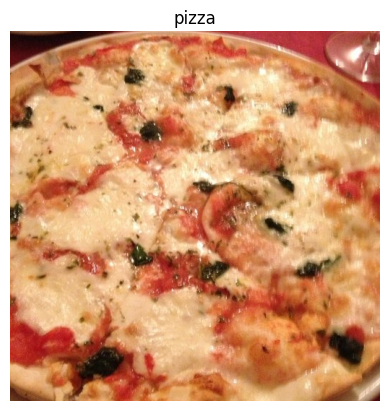

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img

array([[[ 99,  61,  40],
        [105,  67,  46],
        [112,  74,  51],
        ...,
        [172,  90,  79],
        [181,  93,  89],
        [206, 118, 114]],

       [[ 84,  47,  29],
        [ 91,  54,  35],
        [100,  63,  44],
        ...,
        [168,  83,  76],
        [180,  92,  88],
        [209, 121, 117]],

       [[ 67,  31,  19],
        [ 75,  39,  25],
        [ 83,  47,  33],
        ...,
        [167,  78,  72],
        [181,  92,  88],
        [211, 122, 118]],

       ...,

       [[104,  59,  28],
        [104,  59,  28],
        [104,  59,  30],
        ...,
        [ 69,  11,   9],
        [ 68,  10,   8],
        [ 76,  18,  16]],

       [[110,  67,  33],
        [108,  65,  31],
        [106,  63,  31],
        ...,
        [ 72,  14,  13],
        [ 67,  11,  10],
        [ 74,  18,  17]],

       [[116,  73,  39],
        [112,  69,  35],
        [109,  66,  34],
        ...,
        [ 74,  16,  15],
        [ 65,   9,   8],
        [ 68,  12,  11]]

In [ ]:
# The images we've imported and plotted are actually giant arrays/ tensors of differnet pixel values
import tensorflow as tf
tf.constant (img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 99,  61,  40],
        [105,  67,  46],
        [112,  74,  51],
        ...,
        [172,  90,  79],
        [181,  93,  89],
        [206, 118, 114]],

       [[ 84,  47,  29],
        [ 91,  54,  35],
        [100,  63,  44],
        ...,
        [168,  83,  76],
        [180,  92,  88],
        [209, 121, 117]],

       [[ 67,  31,  19],
        [ 75,  39,  25],
        [ 83,  47,  33],
        ...,
        [167,  78,  72],
        [181,  92,  88],
        [211, 122, 118]],

       ...,

       [[104,  59,  28],
        [104,  59,  28],
        [104,  59,  30],
        ...,
        [ 69,  11,   9],
        [ 68,  10,   8],
        [ 76,  18,  16]],

       [[110,  67,  33],
        [108,  65,  31],
        [106,  63,  31],
        ...,
        [ 72,  14,  13],
        [ 67,  11,  10],
        [ 74,  18,  17]],

       [[116,  73,  39],
        [112,  69,  35],
        [109,  66,  34],
        ...,
        [ 74,  16,  1

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discussed beforem many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is too **scale** (also referred to as **normalise**) their pixel values by dividing the image arrays by 255.(since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.38823529, 0.23921569, 0.15686275],
        [0.41176471, 0.2627451 , 0.18039216],
        [0.43921569, 0.29019608, 0.2       ],
        ...,
        [0.6745098 , 0.35294118, 0.30980392],
        [0.70980392, 0.36470588, 0.34901961],
        [0.80784314, 0.4627451 , 0.44705882]],

       [[0.32941176, 0.18431373, 0.11372549],
        [0.35686275, 0.21176471, 0.1372549 ],
        [0.39215686, 0.24705882, 0.17254902],
        ...,
        [0.65882353, 0.3254902 , 0.29803922],
        [0.70588235, 0.36078431, 0.34509804],
        [0.81960784, 0.4745098 , 0.45882353]],

       [[0.2627451 , 0.12156863, 0.0745098 ],
        [0.29411765, 0.15294118, 0.09803922],
        [0.3254902 , 0.18431373, 0.12941176],
        ...,
        [0.65490196, 0.30588235, 0.28235294],
        [0.70980392, 0.36078431, 0.34509804],
        [0.82745098, 0.47843137, 0.4627451 ]],

       ...,

       [[0.40784314, 0.23137255, 0.10980392],
        [0.40784314, 0.23137255, 0.10980392],
        [0.40784314, 0

## An end-to-end example

Let's build a convolutional nerual network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN model to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called as scaling / normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and trun it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                                batch_size = 32,
                                                target_size = (224, 224),
                                                class_mode = "binary",
                                                seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = train_dir,
                                                batch_size = 32,
                                                target_size = (224, 224),
                                                class_mode = "binary",
                                                seed = 42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 213ms/step - loss: 0.6123 - accuracy: 0.6953 - val_loss: 0.5263 - val_accuracy: 0.7313
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4701 - accuracy: 0.7913 - val_loss: 0.4345 - val_accuracy: 0.8113
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4443 - accuracy: 0.8047 - val_loss: 0.4002 - val_accuracy: 0.8333
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4065 - accuracy: 0.8273 - val_loss: 0.3708 - val_accuracy: 0.8367
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3384 - accuracy: 0.8633 - val_loss: 0.2601 - val_accuracy: 0.9060


**Note:** If the above cell is taking longer than 10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime type -> Hardware Accelator -> GPU (you may have to rerun some cells above).

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice/exercise:** Go through the CNN explainer website for a minimum of 10-mins and comopare our neural network with theirs: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

The model we're building is from [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.42519&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs =5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 184ms/step - loss: 3.6928 - accuracy: 0.6740 - val_loss: 1.0861 - val_accuracy: 0.7727
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 1.0366 - accuracy: 0.7067 - val_loss: 0.5616 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7726 - accuracy: 0.7320 - val_loss: 1.1714 - val_accuracy: 0.6620
Epoch 4/5
47/47 [==============================] - 7s 160ms/step - loss: 1.6186 - accuracy: 0.7160 - val_loss: 3.8950 - val_accuracy: 0.5387
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 1.7111 - accuracy: 0.7227 - val_loss: 0.6327 - val_accuracy: 0.8200


In [ ]:
# Get a summary of the model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to imporve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 207ms/step - loss: 2.9490 - accuracy: 0.6193 - val_loss: 0.7684 - val_accuracy: 0.7713
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 1.0828 - accuracy: 0.7027 - val_loss: 0.4665 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5635 - accuracy: 0.7527 - val_loss: 0.5858 - val_accuracy: 0.7207
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.5650 - accuracy: 0.7600 - val_loss: 0.4706 - val_accuracy: 0.7773
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5361 - accuracy: 0.7687 - val_loss: 0.4792 - val_accuracy: 0.7907


In [ ]:
# Get the summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lot of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort our and learn the modst important patterns in an image**. So even thogh these are less learnable parameters in our convolutional neural network these are often more helpful in dexhiphering between different **features** in an image.

## Binary Classification : Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main sep here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1.Become one with the data

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


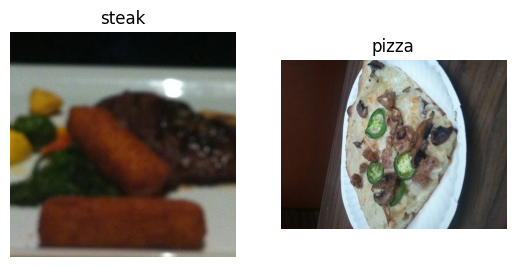

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for the model)

In [ ]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
  1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
  2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
  Because 32 is good for your health....  https://twitter.com/ylecun/status/989610208497360896?lang=en

In [ ]:
!nvidia-smi

Sun Jul 30 15:57:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |   2955MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generates and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and trun them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images / labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.7411765 , 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.75294125, 0.5529412 , 0.34509805],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7607844 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.3019608 ],
          [0.78823537, 0.5372549 , 0.29411766]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinte amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10, # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step, that the sliding window takes across an input
           padding="valid", # if "same", output shape is same as the input shape, if "valid", output shape gets compressed.
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)

    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Comile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model  

In [ ]:
# Check the lenghts of the training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, #this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 133ms/step - loss: 0.7812 - accuracy: 0.6940 - val_loss: 0.3957 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4256 - accuracy: 0.8147 - val_loss: 0.3718 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3667 - accuracy: 0.8333 - val_loss: 0.3934 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.2562 - accuracy: 0.9107 - val_loss: 0.3893 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.1266 - accuracy: 0.9593 - val_loss: 0.3850 - val_accuracy: 0.8420


### 5. Evaluating our model
It looks like our model is learning somethings, let's evalutate it

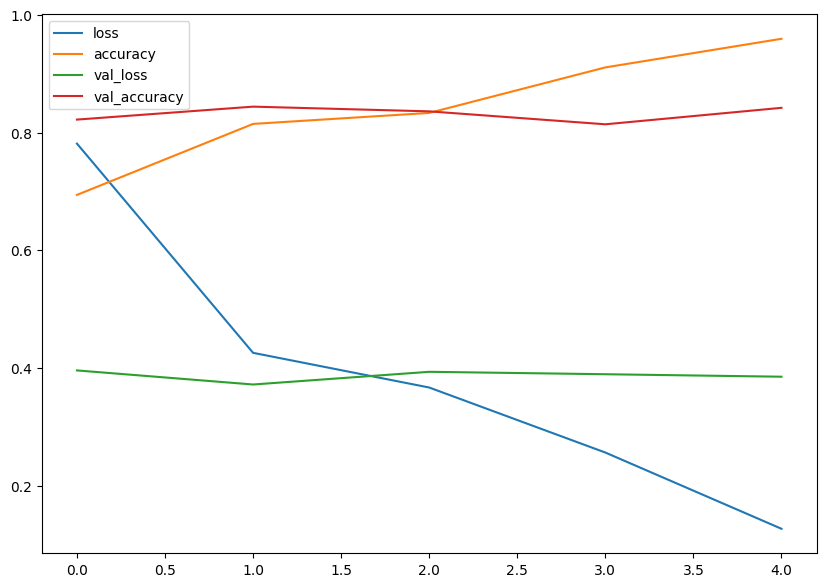

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separately loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalise to unseen data will be diminished.

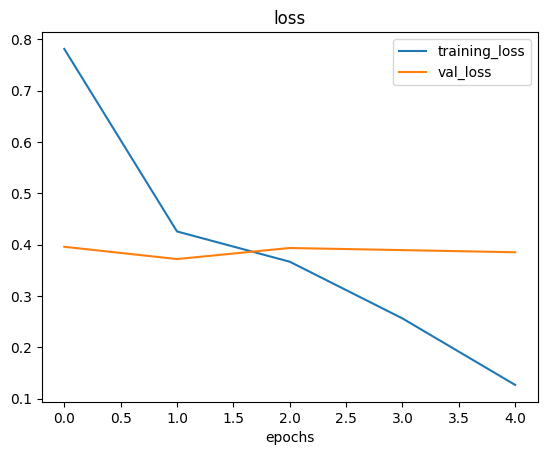

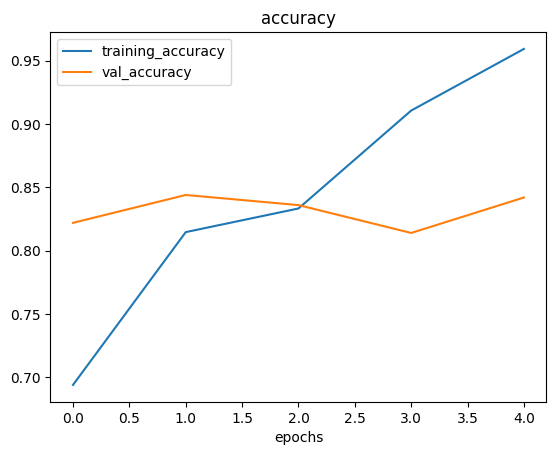

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** ideally the two lossed curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data....

> **Note:** Reducing overfitting is also known as **regularisation**.

In [ ]:
# Create the model (this is going to our new baseline)
model_5 =  Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.6320 - accuracy: 0.6520 - val_loss: 0.4555 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4574 - accuracy: 0.7913 - val_loss: 0.3901 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4174 - accuracy: 0.8180 - val_loss: 0.3811 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4071 - accuracy: 0.8253 - val_loss: 0.3401 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3874 - accuracy: 0.8420 - val_loss: 0.3377 - val_accuracy: 0.8580


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

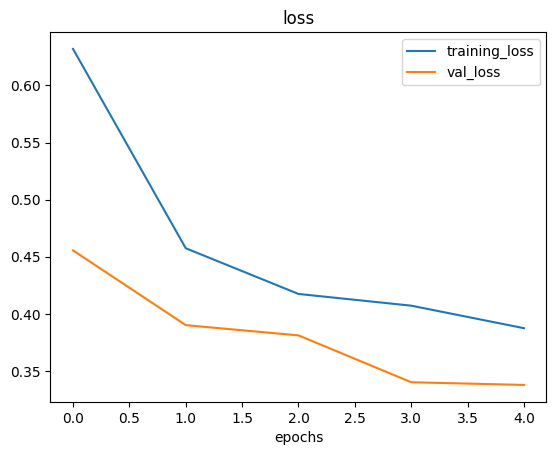

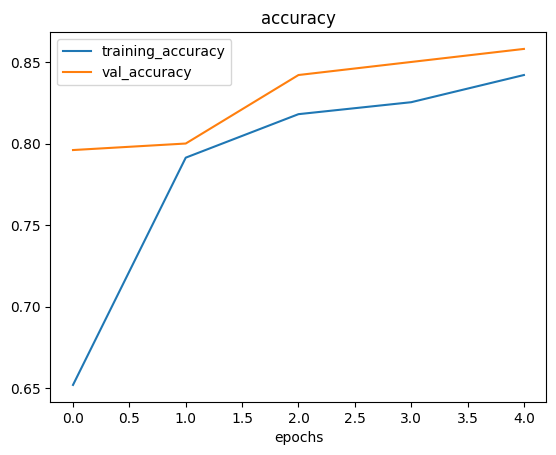

In [ ]:
# Plot loss curvers
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversify and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation....


In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstration purpose only.
# Create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")



Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


>**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally..... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented.... only data(images))

showing image number: 9


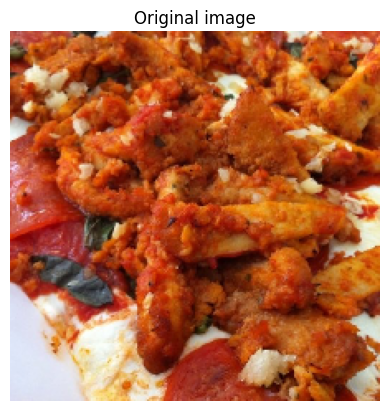

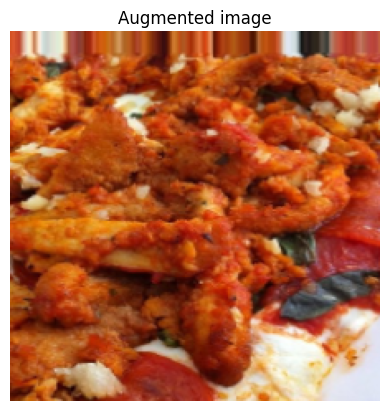

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32....
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)

model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 432ms/step - loss: 0.7361 - accuracy: 0.5513 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.7024 - accuracy: 0.4853 - val_loss: 0.6855 - val_accuracy: 0.6220
Epoch 3/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6865 - accuracy: 0.6093 - val_loss: 0.6806 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6826 - accuracy: 0.5507 - val_loss: 0.6320 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6771 - accuracy: 0.5720 - val_loss: 0.6079 - val_accuracy: 0.8340


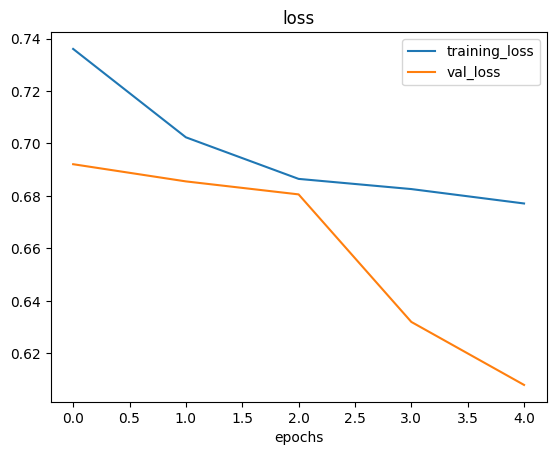

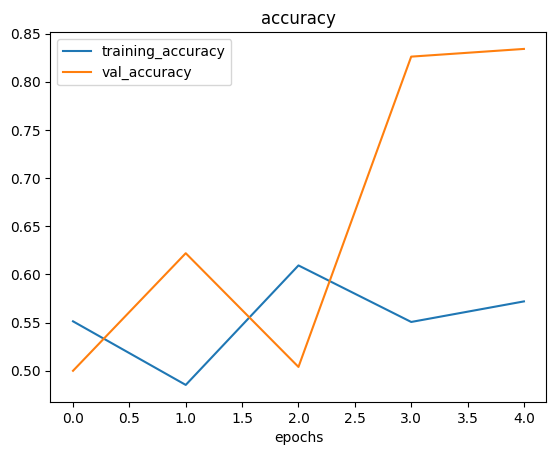

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size=(224, 224),
                                                                             class_mode="binary",
                                                                             batch_size=32,
                                                                             shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 458ms/step - loss: 0.6780 - accuracy: 0.5387 - val_loss: 0.6210 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5673 - accuracy: 0.7127 - val_loss: 0.4235 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5185 - accuracy: 0.7460 - val_loss: 0.3812 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 30s 622ms/step - loss: 0.4962 - accuracy: 0.7647 - val_loss: 0.3778 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4796 - accuracy: 0.7767 - val_loss: 0.3377 - val_accuracy: 0.8560


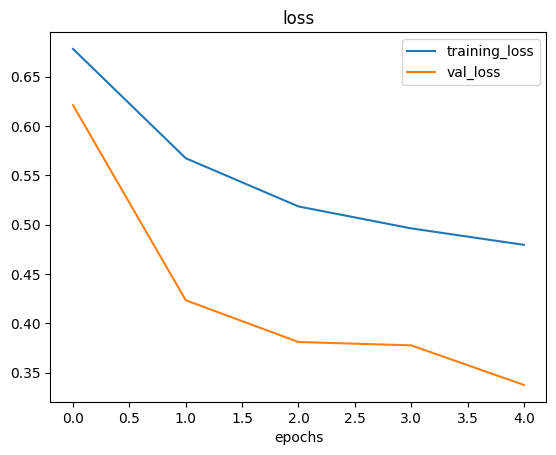

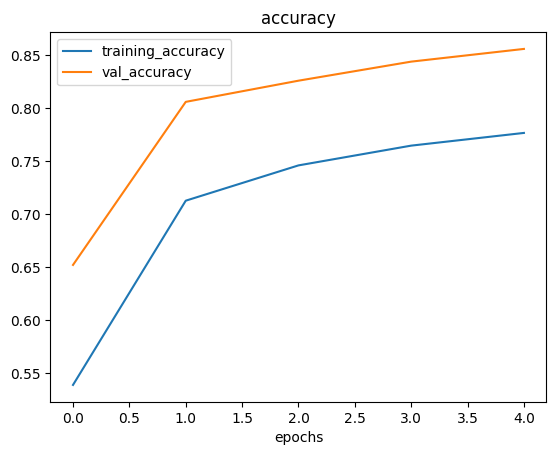

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model get exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to imporve our model:

* Increase the number of model layers (e.g. add more `Conv2D/MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

> **Practise:** Recreate the model on the CNN explainer website(same as model_1) and see how it performs on the shuffled training data.

### Making a prediction with our trained model on our own custom data.

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-07-30 16:04:23--  https://raw.githubuseraccount.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubuseraccount.com (raw.githubuseraccount.com)... failed: Name or service not known.
wget: unable to resolve host address ‘raw.githubuseraccount.com’


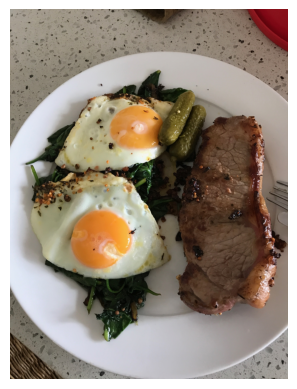

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubuseraccount.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

**Note:** When you a train a neural network and you want to make a precition with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import and image resize it to be able to be used with our model.
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shpae, color_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 262ms/step


array([[0.84621704]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction/

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
# pred_class = class_names[int(tf.round(pred))]
# pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predcited class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 29ms/step


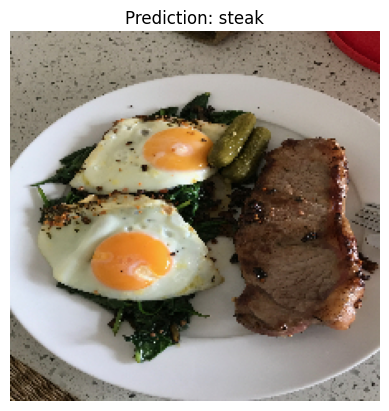

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

# Multi-class Image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).


1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve the model (try to beat baseline/ reduce overfitting)
7. Repeat until satisfied.

## 1. Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-30 16:04:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   182MB/s    in 2.7s    

2023-07-30 16:04:30 (182 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 10 directories and 0 images in 10_fo

In [ ]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Jul 30 16:04 .
drwxr-xr-x  1 root root 4096 Jul 30 16:04 ..
drwxr-xr-x 12 root root 4096 Jul 30 16:04 test
drwxr-xr-x 12 root root 4096 Jul 30 16:04 train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


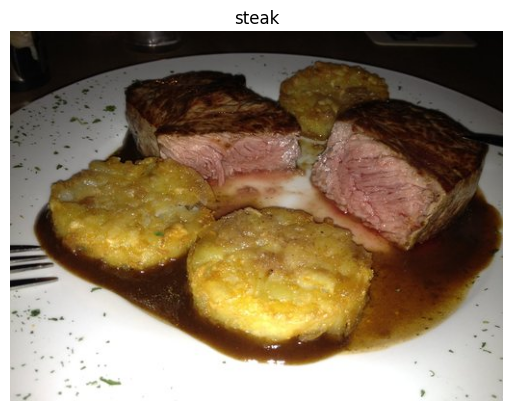

In [ ]:
# Visualize, visualize and visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website....
how about we just take their model (also on 10 classes) and use it for our problem...?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (very similar to previous model but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function.
])

# Compile the modle
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model


In [ ]:
# Fit the modle
history_8 = model_8.fit(train_data, #now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 127ms/step - loss: 2.1838 - accuracy: 0.1839 - val_loss: 1.9546 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 32s 138ms/step - loss: 1.8164 - accuracy: 0.3768 - val_loss: 1.8809 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.3194 - accuracy: 0.5616 - val_loss: 2.0094 - val_accuracy: 0.3288
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 0.6954 - accuracy: 0.7733 - val_loss: 2.6537 - val_accuracy: 0.2832
Epoch 5/5
235/235 [==============================] - 30s 128ms/step - loss: 0.2708 - accuracy: 0.9216 - val_loss: 3.6093 - val_accuracy: 0.2732


### 5. Evaluating the model


In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 3.6093 - accuracy: 0.2732


[3.6092727184295654, 0.27320000529289246]

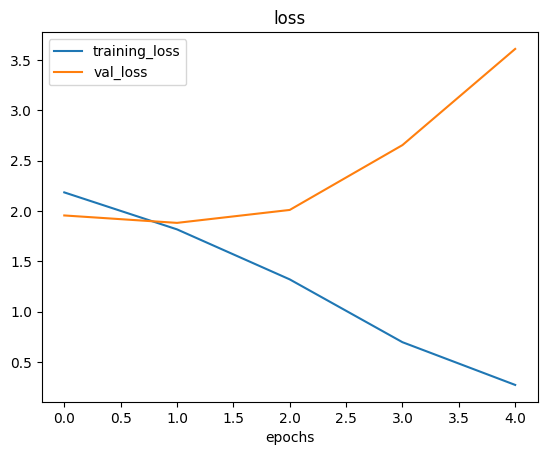

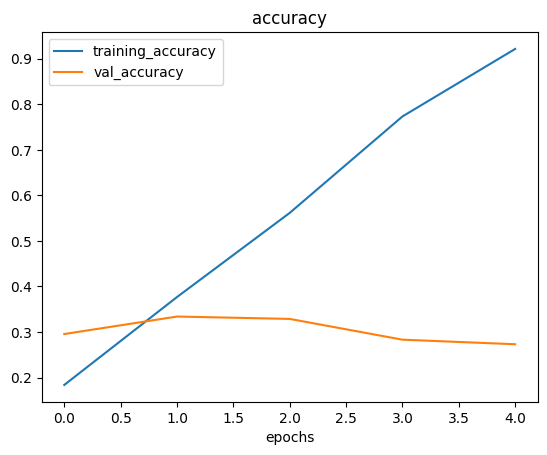

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)


What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalise well to unseen data and performs poorlly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/overfitting)

Due to its performance on the training data, it's clear our model is learning something..

However, it's not generalising well to unseen data (overfitting).

So, let's try and fix overfitting by...
* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use Transfer Learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 121ms/step - loss: 2.2012 - accuracy: 0.2001 - val_loss: 2.0103 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 27s 114ms/step - loss: 1.9227 - accuracy: 0.3363 - val_loss: 1.9621 - val_accuracy: 0.3080
Epoch 3/5
235/235 [==============================] - 27s 117ms/step - loss: 1.6803 - accuracy: 0.4341 - val_loss: 1.9530 - val_accuracy: 0.3008
Epoch 4/5
235/235 [==============================] - 32s 137ms/step - loss: 1.3223 - accuracy: 0.5772 - val_loss: 2.0813 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.9037 - accuracy: 0.7159 - val_loss: 2.3011 - val_accuracy: 0.3016


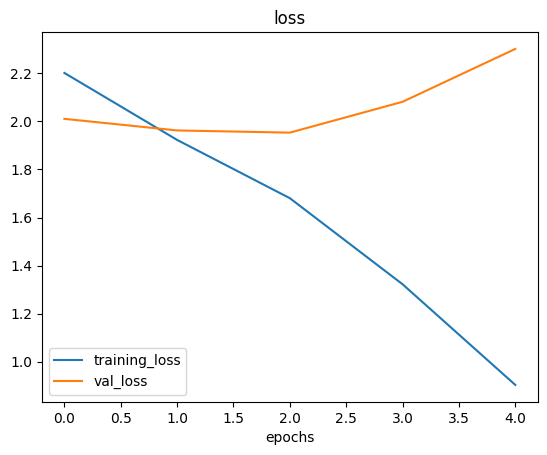

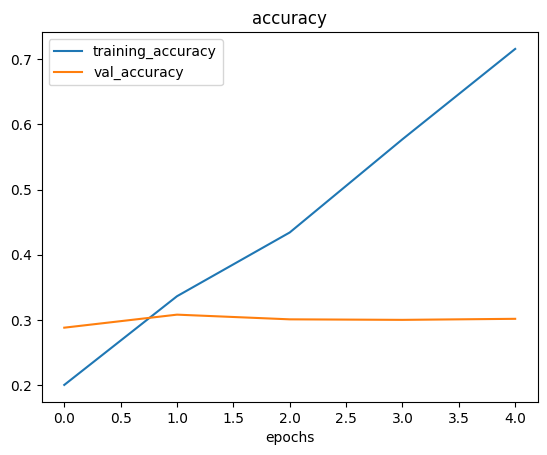

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued....
How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data....

Ideally, we want to:
  * Reduce overfitting (get the train and validation loss curves closer)
  * Improve validation accuracy.

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes.
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 458ms/step - loss: 2.2174 - accuracy: 0.1759 - val_loss: 2.1045 - val_accuracy: 0.2424
Epoch 2/5
235/235 [==============================] - 112s 475ms/step - loss: 2.0837 - accuracy: 0.2483 - val_loss: 1.9112 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 112s 476ms/step - loss: 2.0375 - accuracy: 0.2865 - val_loss: 1.8748 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9929 - accuracy: 0.2928 - val_loss: 1.8293 - val_accuracy: 0.3600
Epoch 5/5
235/235 [==============================] - 127s 542ms/step - loss: 1.9479 - accuracy: 0.3227 - val_loss: 1.7502 - val_accuracy: 0.3960


In [ ]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 8s 104ms/step - loss: 3.6093 - accuracy: 0.2732


[3.6092727184295654, 0.27320000529289246]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 8s 107ms/step - loss: 1.7502 - accuracy: 0.3960


[1.7502260208129883, 0.3959999978542328]

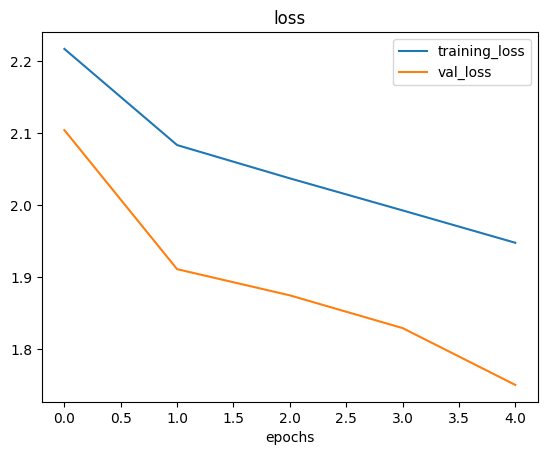

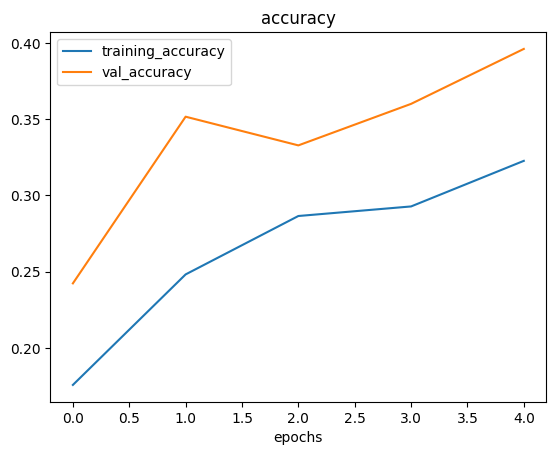

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

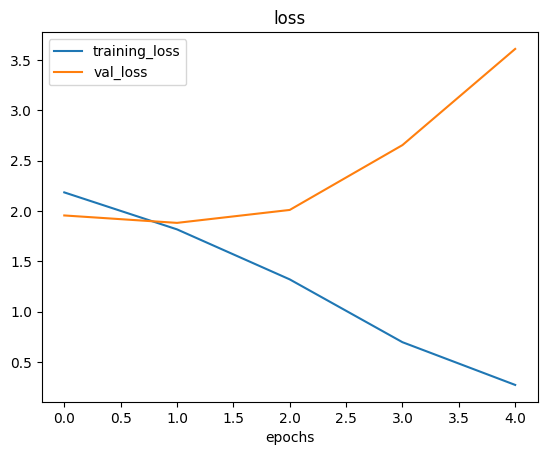

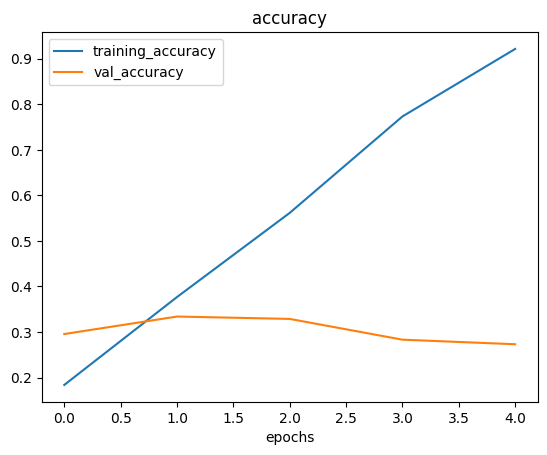

In [ ]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation / test accuracy.

How??

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance).
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our custom images!!


In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg


--2023-07-30 16:39:21--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15618 (15K) [text/plain]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]  15.25K  --.-KB/s    in 0.02s   

2023-07-30 16:39:21 (627 KB/s) - ‘03-pizza-dad.jpeg’ saved [15618/15618]

--2023-07-30 16:39:22--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15626 (15K) [text/plain]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]  15.26K  --.-KB/s    in 0.1s    

2023-07-30 16:39:22 (139 KB/s) - ‘03-hamburger.jpeg’ saved [15626/15626]

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  print(len(pred[0]))
  print(tf.argmax(pred))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 28ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


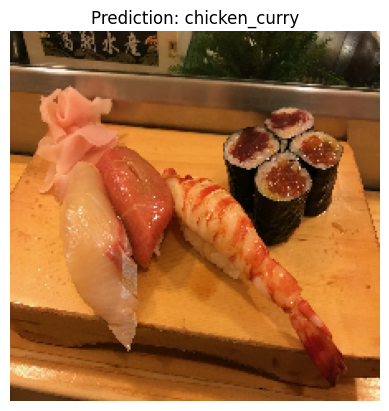

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved -39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and Loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 1.7502 - accuracy: 0.3960


[1.7502260208129883, 0.3959999978542328]